In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
df = pd.read_csv("./Soil Nutrients.csv")
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0


In [ ]:
df = df.drop(columns=["Category_pH"])

In [51]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Name', 'Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type', 'Season']
Numerical Columns: ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus', 'Potassium', 'Yield', 'N_Ratio', 'P_Ratio', 'K_Ratio']


In [52]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,0.019536,-0.589525,0.218607,1.403239,0.712387,1.267058,0.478975,0.151289,0.604410,-0.153172,low_acidic,Loam,Summer,-0.18794,-0.295842,-0.317391
1,Strawberry,Moderate,Day Neutral,-0.620371,-0.697355,-0.493359,1.392241,0.565548,1.306123,0.624047,0.183582,0.638829,-0.151036,low_acidic,Loam,Spring,-0.18794,-0.295842,-0.317391
2,Strawberry,Moderate,Short Day Period,-0.911635,-0.512730,-0.281579,1.347004,0.603324,1.277060,0.660791,0.127472,0.598336,-0.231077,low_acidic,Loam,Summer,-0.18794,-0.295842,-0.317391
3,Strawberry,Moderate,Short Day Period,-1.476929,-0.830750,-0.476008,1.491108,0.455688,1.270078,0.570647,0.200248,0.544456,-0.159852,low_acidic,Loam,Summer,-0.18794,-0.295842,-0.317391
4,Strawberry,Moderate,Day Neutral,0.145598,-0.417406,-0.198185,1.488787,0.602073,1.327971,0.686330,0.253220,0.609691,-0.151385,low_acidic,Loam,Spring,-0.18794,-0.295842,-0.317391


In [53]:
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

df.head()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,...,Category_pH_low_acidic,Category_pH_low_alkaline,Category_pH_neutral,Soil_Type_Loam,Soil_Type_Sandy,Soil_Type_Sandy Loam,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.019536,-0.589525,0.218607,1.403239,0.712387,1.267058,0.478975,0.151289,0.604410,-0.153172,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.620371,-0.697355,-0.493359,1.392241,0.565548,1.306123,0.624047,0.183582,0.638829,-0.151036,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.911635,-0.512730,-0.281579,1.347004,0.603324,1.277060,0.660791,0.127472,0.598336,-0.231077,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.476929,-0.830750,-0.476008,1.491108,0.455688,1.270078,0.570647,0.200248,0.544456,-0.159852,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.145598,-0.417406,-0.198185,1.488787,0.602073,1.327971,0.686330,0.253220,0.609691,-0.151385,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
# Define features and target variable
X = df.drop("pH", axis=1)
y = df["pH"]

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42, max_depth=20, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.22016808996354478, 0.7856666829052827)

In [57]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=20, random_state=42)
regr.fit(X_train, y_train)
# Make predictions
y_pred = regr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.3754561480308938, 0.6344939830091125)

In [63]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
svr.fit(X_train, y_train)
# Make predictions
y_pred = svr.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.20895042174204434, 0.7965870666919628)

/Users/rafi/.local/share/mise/installs/python/3.12.7/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4833 - val_loss: 0.2478
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2254 - val_loss: 0.2405
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2317 - val_loss: 0.2453
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2200 - val_loss: 0.2352
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2266 - val_loss: 0.2264
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2159 - val_loss: 0.2235
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2160 - val_loss: 0.2388
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2267 - val_loss: 0.2257
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE: 0.22143490883558484
R2: 0.7844334365658723


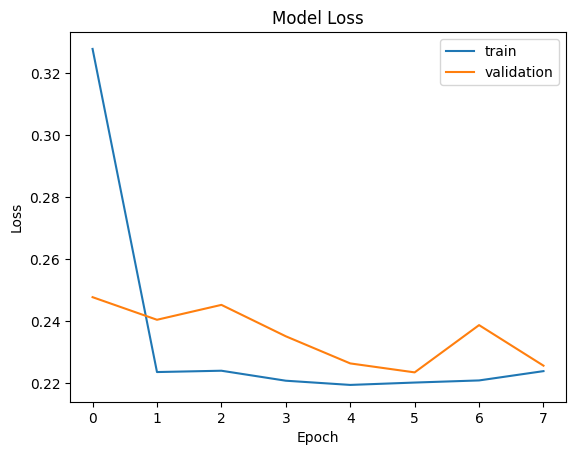

In [61]:
import keras

callback = keras.callbacks.EarlyStopping(monitor="loss", patience=3)

model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[callback])
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()